# Week 8 assignment: NLP on social media data

Take our social media we collected last week and:

- extract the sentiment scores of the titles of the posts
    - you can use the keyword method, Python packages, or other methods to extract the sentiment scores
- plot a histogram of the sentiment scores
- look at descriptive statistics (mean, median, standard deviation) of the sentiment scores
- examine the text for some of the highest and lowest sentiment scores
- write a short analysis of the results and our process, as well as propose one idea for something we could use this data for

Optional advanced challenges:
- Compare different sentiment analysis methods (e.g. textblob and VADER). Does one seem to work better than another?
- Get the sentiments of the comments for each post. We can do a lot with this, such as:
    - look at the average sentiment for each post and compare it with the sentiment of the title and/or text
    - look at the distribution of sentiments for each post and find the posts with the widest range of sentiments (controversial posts)
- Examine the subjectivity of our data (e.g. using textblob)
- Use topic modeling on the posts
    - you can also add in the comments to the topic model
- Look at the most frequent words for positive and negative sentiment posts

Note: There is no assignment solution file for this week.

In [1]:
import sqlite3
import pandas as pd

con = sqlite3.connect('data\sf_reddit.sqlite')
df = pd.read_sql_query('SELECT * from posts;', con)
con.close()
df

,index,has-text,author,link,id,video,n_comments,title,score,text,media-link
0,0,0,boroboroclothing,/r/SustainableFashion/comments/l6it87/what_do_...,l6it87,0,26,What do you think about this Upcycled/Reworked...,412,,https://www.reddit.com/gallery/l6it87
1,1,0,geminigirly,/r/SustainableFashion/comments/l1k9je/bernies_...,l1k9je,0,8,Bernie’s memed mittens made by a teacher in Ve...,407,,https://i.redd.it/b6vwqng5dkc61.jpg
2,2,0,Bydanielpearce,/r/SustainableFashion/comments/i8jey0/turned_3...,i8jey0,0,17,Turned 3 old T-shirts into 1 new one ♻️♻️♻️,362,,https://www.reddit.com/gallery/i8jey0
3,3,0,stephmiche,/r/SustainableFashion/comments/hz3j42/made_som...,hz3j42,0,13,Made some vintage-looking shorts out of thrift...,349,,https://www.reddit.com/gallery/hz3j42
4,4,0,TaylerCmone,/r/SustainableFashion/comments/khmahw/i_rework...,khmahw,1,13,I reworked a $12 Thrifted Ralph Lauren Blazer ...,279,,https://v.redd.it/imct6n16wk661
...,...,...,...,...,...,...,...,...,...,...,...
995,995,0,jabruce,/r/SustainableFashion/comments/o68ybq/check_ou...,o68ybq,0,0,Check out www.ozoneapparel.store - a fashion b...,5,,https://i.redd.it/8tuk22l8cz671.jpg
996,996,1,vildusmaximus,/r/SustainableFashion/comments/o2p2ki/y2k_fash...,o2p2ki,0,7,Y2k fashion?,5,Im in love with the y2k style. But its really ...,https://www.reddit.com/r/SustainableFashion/co...
997,997,1,2littleduckscameback,/r/SustainableFashion/comments/o1jl4t/business...,o1jl4t,0,3,Business clothes,7,Does anyone have recommendations for sustainab...,https://www.reddit.com/r/SustainableFashion/co...
998,998,1,kollaking,/r/SustainableFashion/comments/nkif13/linen_tr...,nkif13,0,0,Linen Trail - A Slow Fashion label from India ...,6,&#x200B;\n\n[Rasamalli Hand Embroidered Pure L...,https://www.reddit.com/r/SustainableFashion/co...


In [2]:
df['alltext'] = df['title'] + df['text']

In [3]:
from textblob import TextBlob

def get_tb_sentiment(text):
    tb = TextBlob(text)
    return tb.sentiment[0]

df['tb_sentiment'] = df['alltext'].apply(get_tb_sentiment)

In [4]:
df

,index,has-text,author,link,id,video,n_comments,title,score,text,media-link,alltext,tb_sentiment
0,0,0,boroboroclothing,/r/SustainableFashion/comments/l6it87/what_do_...,l6it87,0,26,What do you think about this Upcycled/Reworked...,412,,https://www.reddit.com/gallery/l6it87,What do you think about this Upcycled/Reworked...,0.125000
1,1,0,geminigirly,/r/SustainableFashion/comments/l1k9je/bernies_...,l1k9je,0,8,Bernie’s memed mittens made by a teacher in Ve...,407,,https://i.redd.it/b6vwqng5dkc61.jpg,Bernie’s memed mittens made by a teacher in Ve...,0.000000
2,2,0,Bydanielpearce,/r/SustainableFashion/comments/i8jey0/turned_3...,i8jey0,0,17,Turned 3 old T-shirts into 1 new one ♻️♻️♻️,362,,https://www.reddit.com/gallery/i8jey0,Turned 3 old T-shirts into 1 new one ♻️♻️♻️,0.118182
3,3,0,stephmiche,/r/SustainableFashion/comments/hz3j42/made_som...,hz3j42,0,13,Made some vintage-looking shorts out of thrift...,349,,https://www.reddit.com/gallery/hz3j42,Made some vintage-looking shorts out of thrift...,0.000000
4,4,0,TaylerCmone,/r/SustainableFashion/comments/khmahw/i_rework...,khmahw,1,13,I reworked a $12 Thrifted Ralph Lauren Blazer ...,279,,https://v.redd.it/imct6n16wk661,I reworked a $12 Thrifted Ralph Lauren Blazer ...,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,0,jabruce,/r/SustainableFashion/comments/o68ybq/check_ou...,o68ybq,0,0,Check out www.ozoneapparel.store - a fashion b...,5,,https://i.redd.it/8tuk22l8cz671.jpg,Check out www.ozoneapparel.store - a fashion b...,0.000000
996,996,1,vildusmaximus,/r/SustainableFashion/comments/o2p2ki/y2k_fash...,o2p2ki,0,7,Y2k fashion?,5,Im in love with the y2k style. But its really ...,https://www.reddit.com/r/SustainableFashion/co...,Y2k fashion?Im in love with the y2k style. But...,0.177083
997,997,1,2littleduckscameback,/r/SustainableFashion/comments/o1jl4t/business...,o1jl4t,0,3,Business clothes,7,Does anyone have recommendations for sustainab...,https://www.reddit.com/r/SustainableFashion/co...,Business clothesDoes anyone have recommendatio...,0.241667
998,998,1,kollaking,/r/SustainableFashion/comments/nkif13/linen_tr...,nkif13,0,0,Linen Trail - A Slow Fashion label from India ...,6,&#x200B;\n\n[Rasamalli Hand Embroidered Pure L...,https://www.reddit.com/r/SustainableFashion/co...,Linen Trail - A Slow Fashion label from India ...,0.129589


In [5]:
df.sort_values(by='tb_sentiment')[['score','alltext', 'tb_sentiment']]

,score,alltext,tb_sentiment
223,43,Sustainable brands that sell clothes like thes...,-0.750
342,27,Why is polyester fashion so bad for the enviro...,-0.700
210,49,"“Don’t get depressed, get angry! We’re the one...",-0.625
84,106,"Made a dress and headpiece out of bedsheets, p...",-0.600
583,15,Artificial Intelligence Expert Builts a Bird F...,-0.600
...,...,...,...
558,15,Great Interview With House of Bean Owner Clari...,0.800
679,12,Best sustainable denim brands?Hey everyone! Ho...,1.000
911,6,Sustainable bathing suitI have been looking fo...,1.000
530,17,5 of the best sustainable underwear brands - w...,1.000


<AxesSubplot:ylabel='Frequency'>

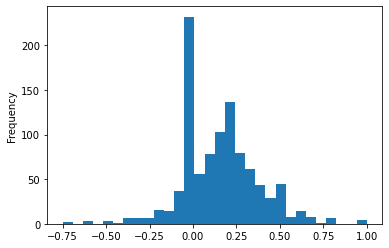

In [6]:
df['tb_sentiment'].plot.hist(bins=30)

In [7]:
df['tb_sentiment'].describe()

count    1000.000000
mean        0.156683
std         0.216724
min        -0.750000
25%         0.000000
50%         0.141865
75%         0.271469
max         1.000000
Name: tb_sentiment, dtype: float64

In [8]:
top_10_sentiment = df.sort_values(by='tb_sentiment')['alltext'].to_list()[:10]
bottom_10_sentiment = df.sort_values(by='tb_sentiment')['alltext'].to_list()[1:]

In [9]:
top_10_sentiment

['Sustainable brands that sell clothes like these? (don’t think this brand is sustainable *:( ).',
 'Why is polyester fashion so bad for the environment?',
 '“Don’t get depressed, get angry! We’re the ones that caused every one of these problems, so therefore we’re the ones that have to solve it.” -Yvon Chouinard, founder of Patagonia',
 'Made a dress and headpiece out of bedsheets, pipe cleaners, bbq skewers, and artificial flowers 🌸',
 'Artificial Intelligence Expert Builts a Bird Feeder That Turns Crows Into Recycling Pros',
 'We tested Everlane and they failed. Here’s what happened.',
 'We tested Alternative Apparel and they failed. Here’s what happened.',
 'We tested Allbirds and they failed. Here’s what happened.',
 'UPDATE: Vetta polybags are made from recycled material. Unfortunately, I cannot recycle it again, so still not great.',
 "Shopping sustainable brands shouldn't leave you confused and wondering who to trust. Check out 20 thoroughly researched brands for everyone."]

In [10]:
import nltk
from nltk.corpus import stopwords

stops = stopwords.words('english')
stops = set(stops) | set({"-", "&", "sustainable", "fashion", "really", '*:(', ').', '–'})
sf_df_words = ' '.join(df.sort_values(by='tb_sentiment')['alltext'].to_list()[:50]).lower().split()
df_words = [w for w in sf_df_words if w not in set(stops)]


fd_df = nltk.FreqDist(df_words)

In [11]:
fd_df.most_common(20)

[('made', 13),
 ('shopping', 6),
 ('slow', 6),
 ('waste', 6),
 ('brands', 5),
 ('patagonia', 4),
 ('textile', 4),
 ('clothes', 3),
 ('bad', 3),
 ('get', 3),
 ('ones', 3),
 ('tested', 3),
 ('failed.', 3),
 ('here’s', 3),
 ('happened.', 3),
 ('jacket', 3),
 ('want', 3),
 ('eco-friendly', 3),
 ('less', 3),
 ('means', 3)]

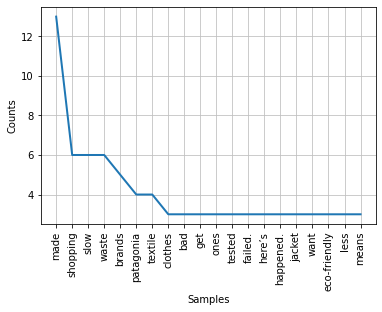

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [12]:
fd_df.plot(20)

<AxesSubplot:xlabel='tb_sentiment', ylabel='score'>

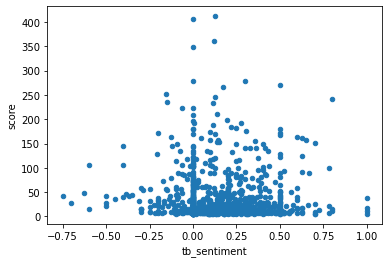

In [13]:
df.plot.scatter(x='tb_sentiment', y='score')

# Summary

Write a short summary of what you did and the results here.

I loaded my sql query for the SustainableFashion subreddit. I then combined the title and text strings into one column to prepare for sentiment analysis. I used textblob to complete the sentiment analysis where I found that the average sentiment score was about .15 while the most frequent sentiment score was a neutral 0. I was interested in the correlation between the score of the post and the sentiment score. I wanted to know whether or not the sentiment score could predict a higher score for a post or if it was even related at all. I broke down the highest sentiment scores and ran a frequency distribution to find the most common words. Later, I will use this data to run sentiment analysis on each word and run a TopicAnalysis on the highest scoring posts. There wasn't anything that really stood out to me about the words other than they were part of a theme and some of the posts may be controversial. Another analysis to conduct would be to find the correlations between controversiality and scores. As for the scores vs sentiment scores: The highest scores were most frequently associated with neutral sentiments and a 0.5 sentiment. The lowest scores were on the poles of best sentiment to worst. There is a very slight trend where the higher the sentiment score the greater the score caping at 0.75 and a score of 250.